In [6]:
from federated_learning.utils import SHAPUtil, experiment_util, Visualizer
from federated_learning import ClientPlane, Configuration, ObserverConfiguration
from federated_learning.server import Server
from datetime import datetime
import random

In [ ]:
class ExperimentalSummary():

In [7]:
import numpy as np
def diag_mean_values(shap_values, server_shap = False):
    diag_mean = []
    diag_diff_mean = []
    for row_idx, row in enumerate(shap_values):
        for img_idx, image in enumerate(row):
            if row_idx == img_idx:
                diag_mean.append(np.median(shap_values[row_idx][img_idx][np.nonzero(shap_values[row_idx][img_idx])]))
                if server_shap:
                    arr = np.subtract(image, server_shap[row_idx][img_idx])
                    diag_diff_mean.append(np.median(arr[np.nonzero(arr)]))
    print(diag_mean)
    print(diag_diff_mean)

## Configurations

In [8]:
config = Configuration()
config.FROM_LABEL = 4
config.TO_LABEL = 5
config.POISONED_CLIENTS = 10
data = config.DATASET(config)
shap_util = SHAPUtil(data.test_dataloader)
observer_config = ObserverConfiguration()
visualizer = Visualizer(shap_util)

MNIST training data loaded.
MNIST test data loaded.


## Experimental Setup

In [9]:
server = Server(config, observer_config,data.train_dataloader, data.test_dataloader, shap_util)
client_plane = ClientPlane(config, observer_config, data, shap_util)
client_plane.poison_clients()
clean_idx = experiment_util.select_random_clean(client_plane, config, 10)
poisoned_idx = experiment_util.select_poisoned(client_plane, 10)
print(clean_idx)

Create 200 clients with dataset of size 300
Poison 10/200 clients
Flip 100.0% of the 4 labels to 5
[ 55 188 160  44  61  16  30  42 126  33]
[153, 121, 89, 145, 65, 77, 143, 179, 86, 11]


In [ ]:
#len(client_plane.clients[0].train_dataloader.dataset.dataset.targets[client_plane.clients[0].train_dataloader.dataset.dataset.targets == 5])

## Experiment


Test set: Average loss: 0.0007, Accuracy: 8710/10000 (87%)

Server 1


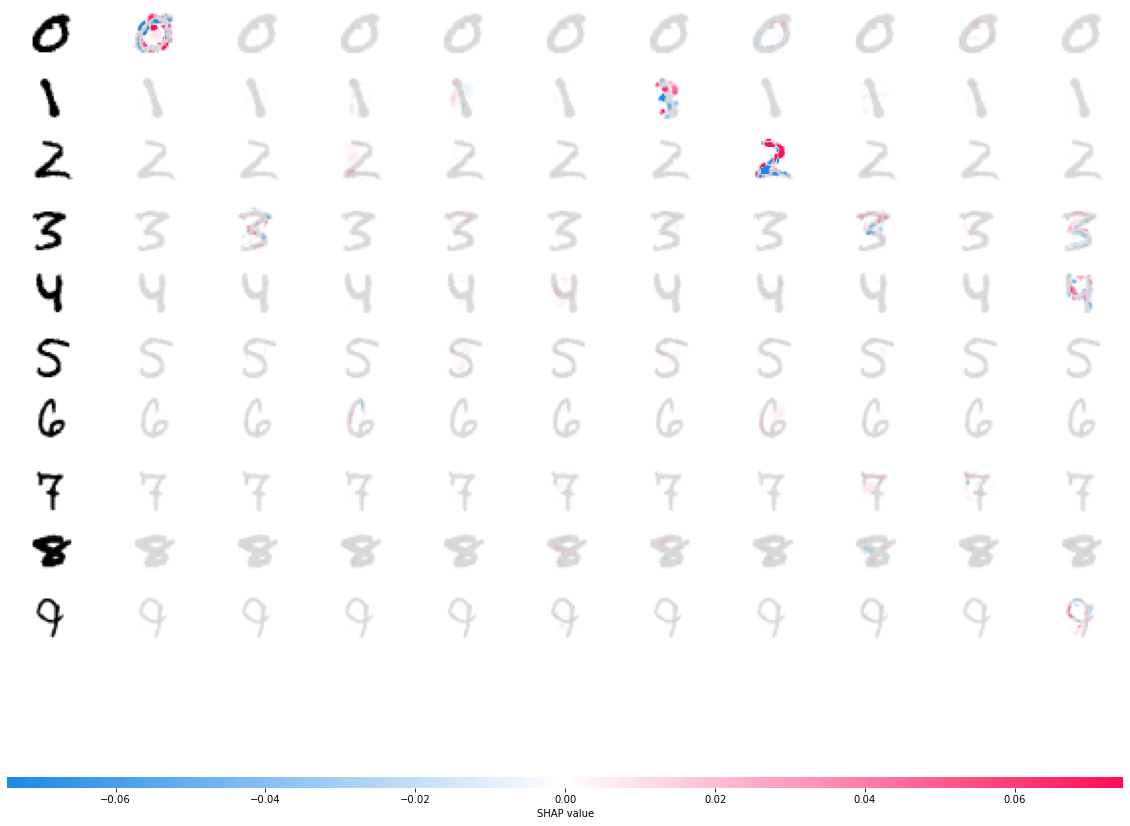

Client Clean 1


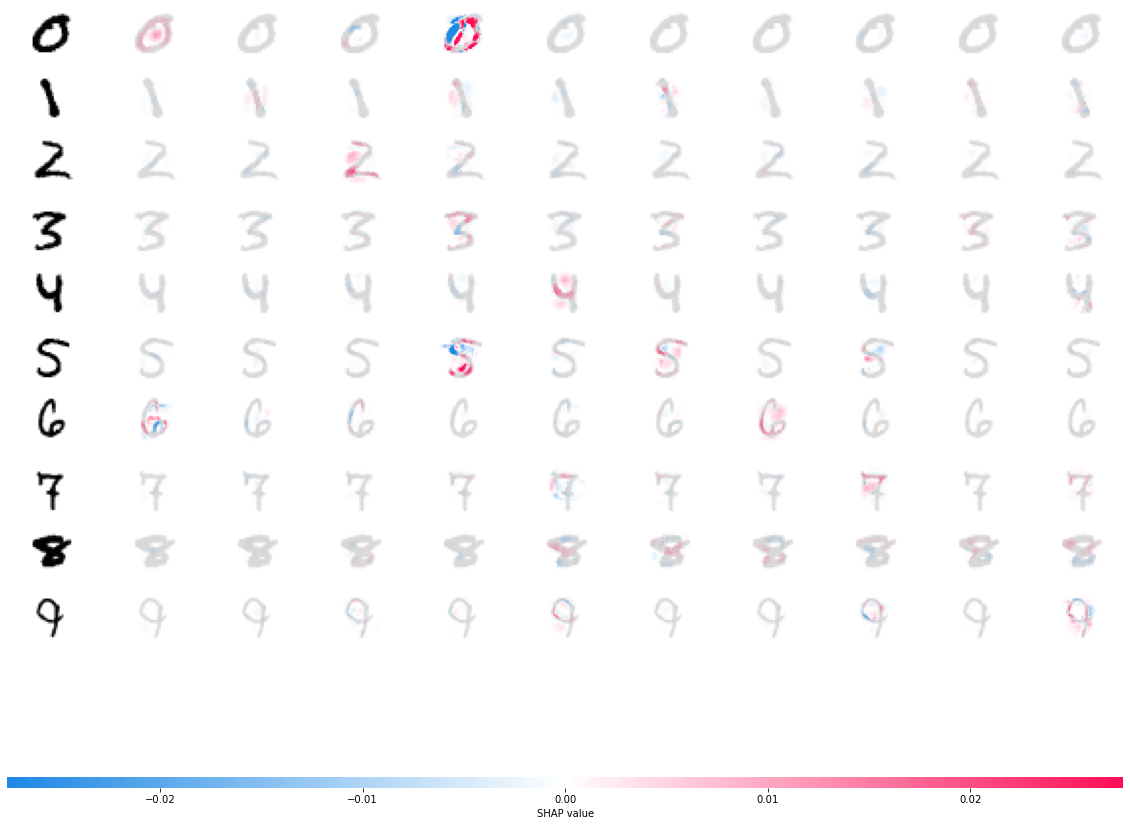

10 10


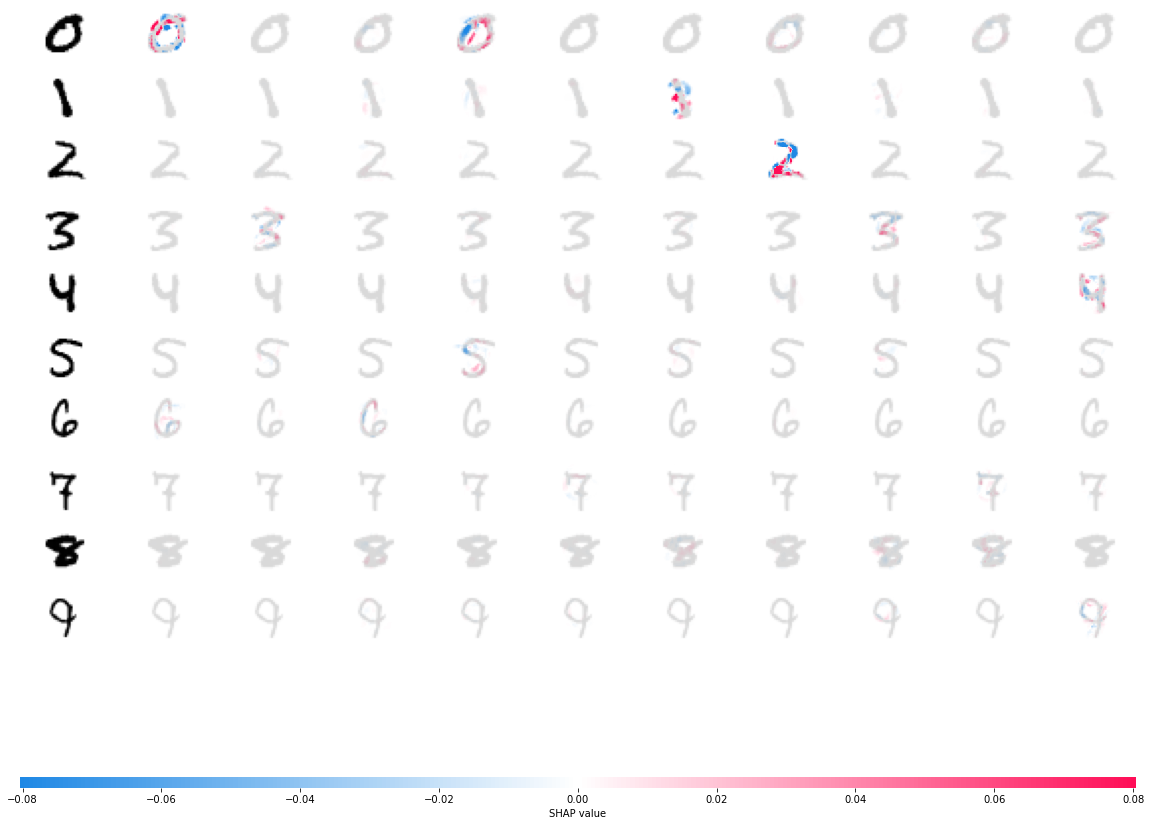

[0.0004388143861433491, 3.325914076413028e-05, 0.00022777420235797763, 1.4513366295432206e-05, 0.0001350779493805021, 0.00012351321493042633, 0.00018906237528426573, 2.9513274057535455e-05, 4.3799398099508835e-06, 9.313675400335342e-05]
[-2.22213924416792e-06, 6.963766281842254e-06, 5.439759115688503e-05, -2.110077730321791e-07, 2.0983046852052212e-05, 3.7576704926323146e-05, 1.9404717477300437e-05, -1.5045952750369906e-05, -1.003132581445243e-06, 6.384683274518466e-06]
Client Poisoned 1


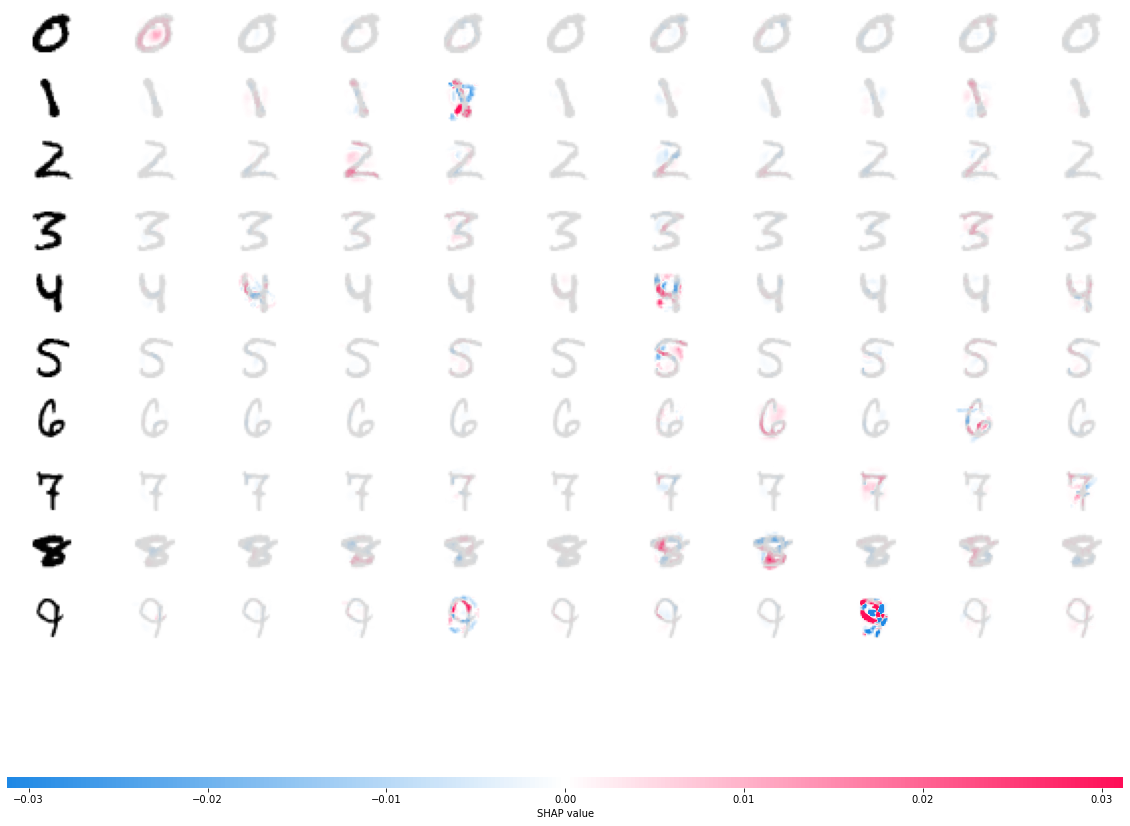

10 10


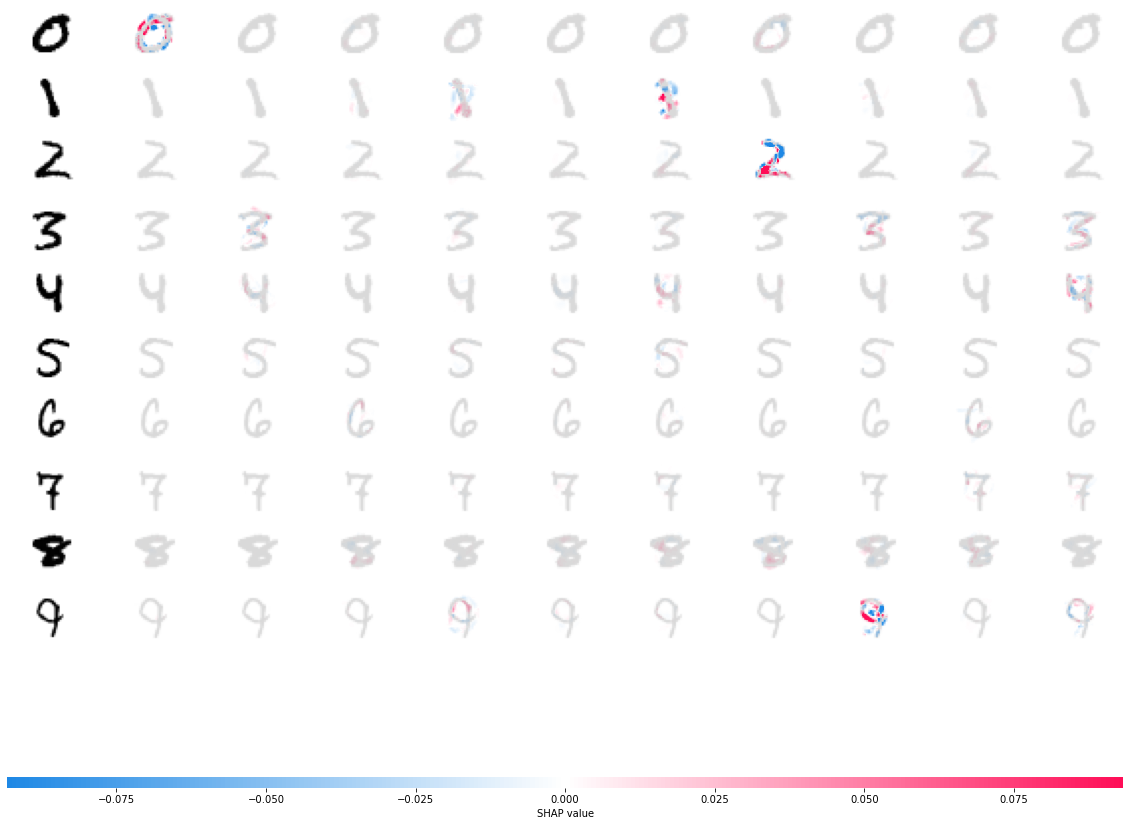

[0.0004859041655436158, 2.2618758521275595e-05, 0.00018478477431926876, 8.272783816209994e-06, 4.16813709307462e-05, 2.9684013497899286e-05, 0.00015308083675336093, 5.627388418361079e-05, 6.587653615497402e-06, 6.199788913363591e-05]
[3.715226910117053e-06, -9.816806141316192e-07, 2.730121195781976e-07, -4.422402889758814e-05, -8.562963193980977e-05, 1.0109728592055944e-06, 3.2216545520213913e-07, -5.562101250689011e-07, 7.216717676783446e-07, -4.965206414908607e-06]
Round 1 finished

Test set: Average loss: 0.0007, Accuracy: 8808/10000 (88%)

Server 2


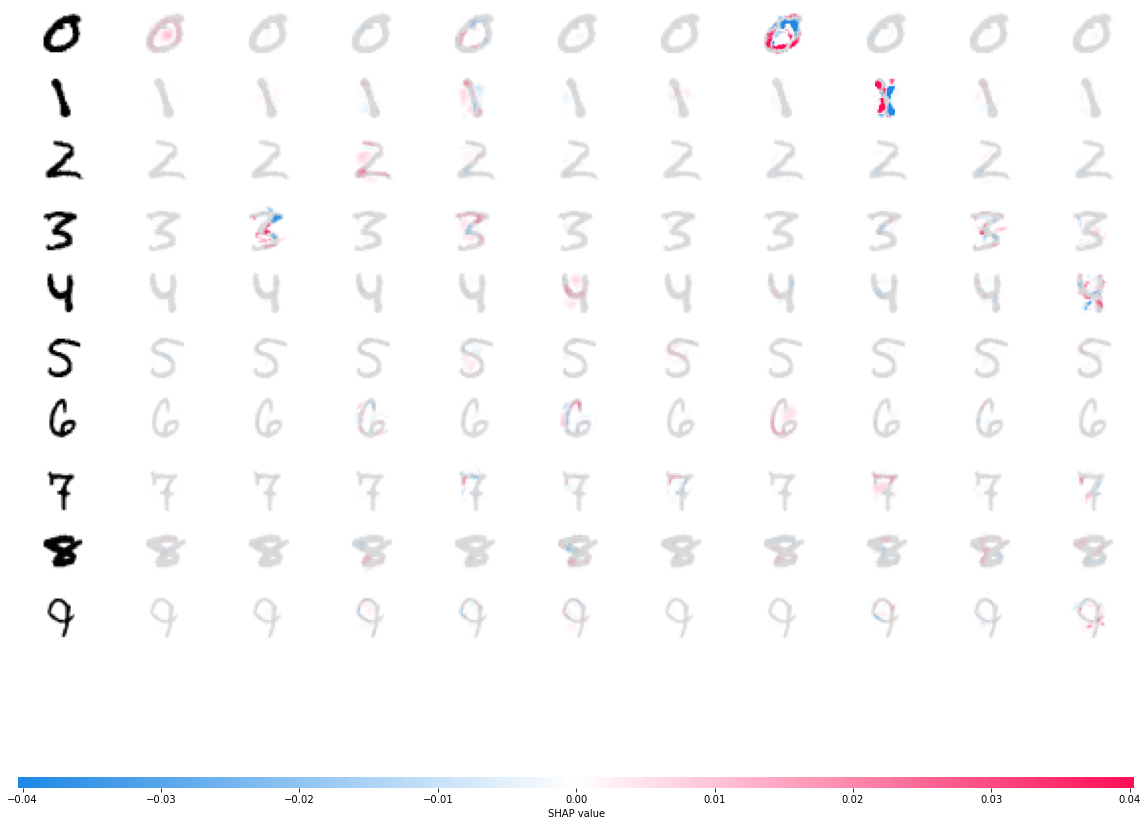

Client Clean 2


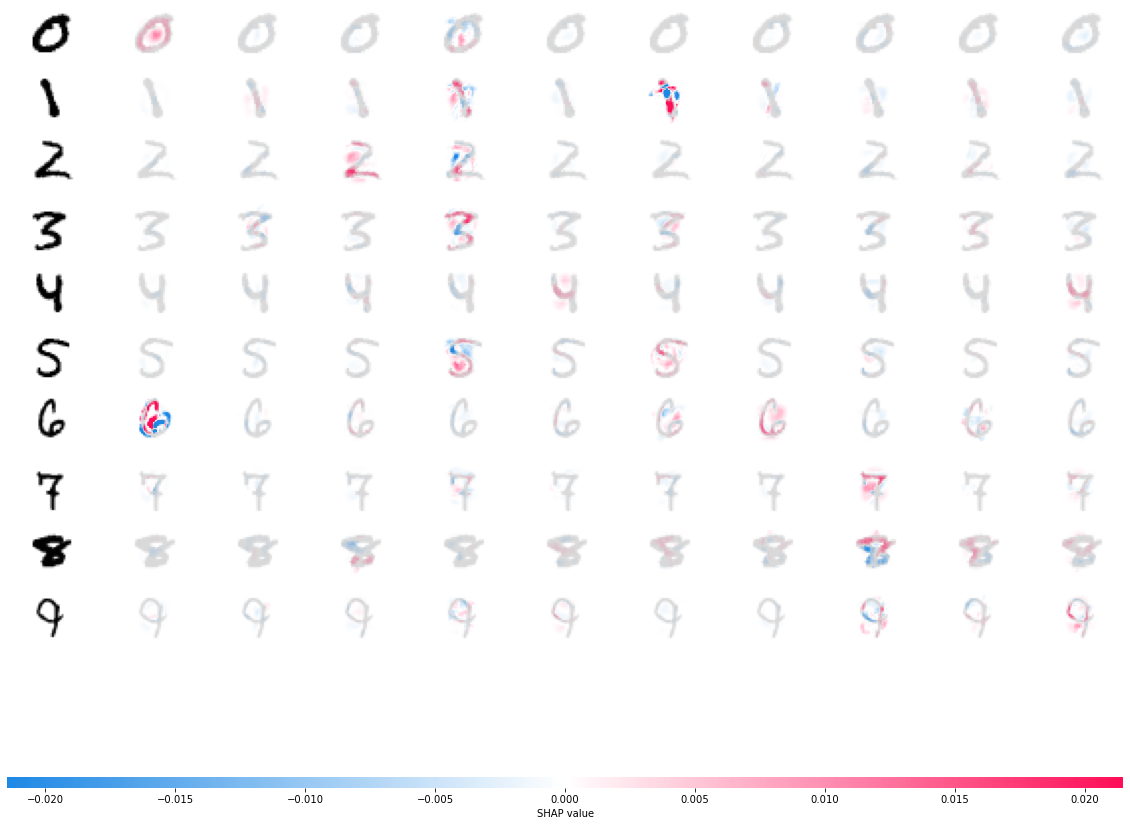

10 10


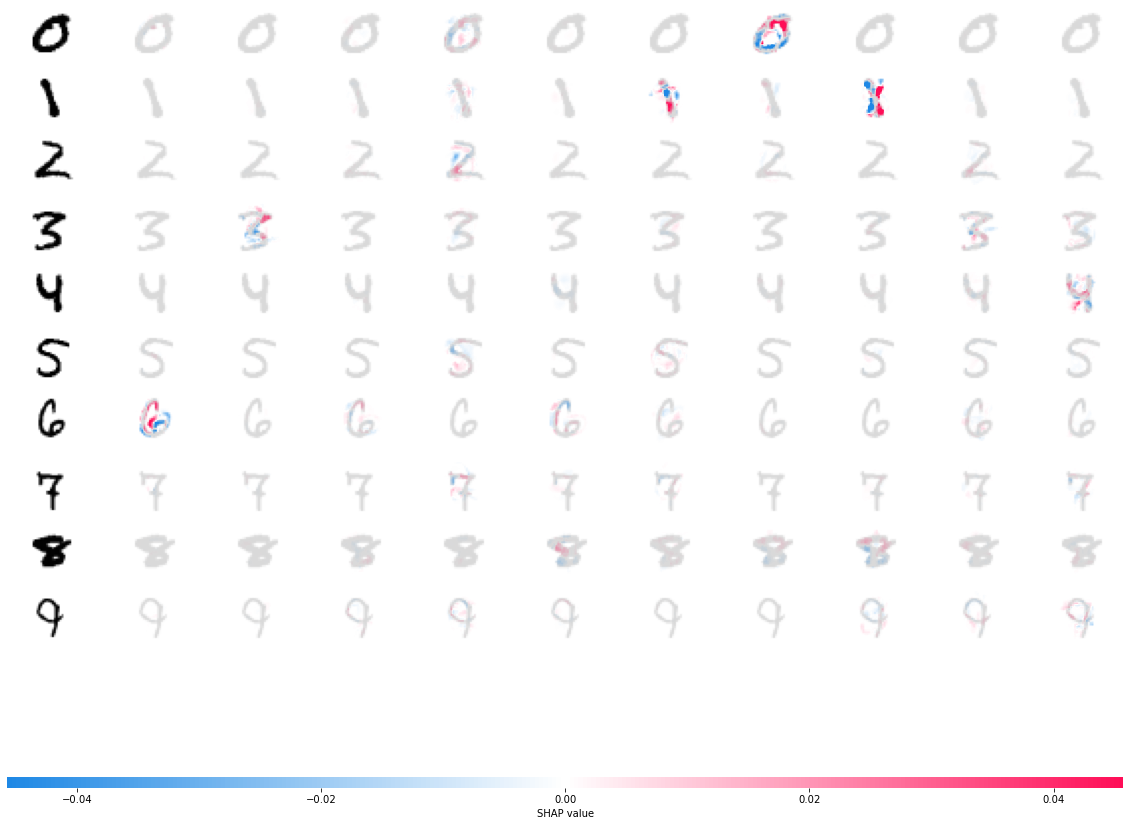

[0.00037491231341846287, 1.6034524378483184e-05, 0.0002033295459114015, 2.6498017177800648e-05, 8.576615073252469e-05, 0.00017594339442439377, 0.0001705553731881082, 5.57401235710131e-05, 2.6523030101088807e-05, 6.37759076198563e-05]
[-3.6172532418277115e-06, 6.313579206107534e-07, 1.2202341167721897e-05, 7.800692856108071e-06, -4.616613296093419e-05, 4.8568677811999805e-05, -4.485603312787134e-06, 9.345214493805543e-06, 1.3328990462468937e-06, 3.4553831937955692e-06]
Client Poisoned 2


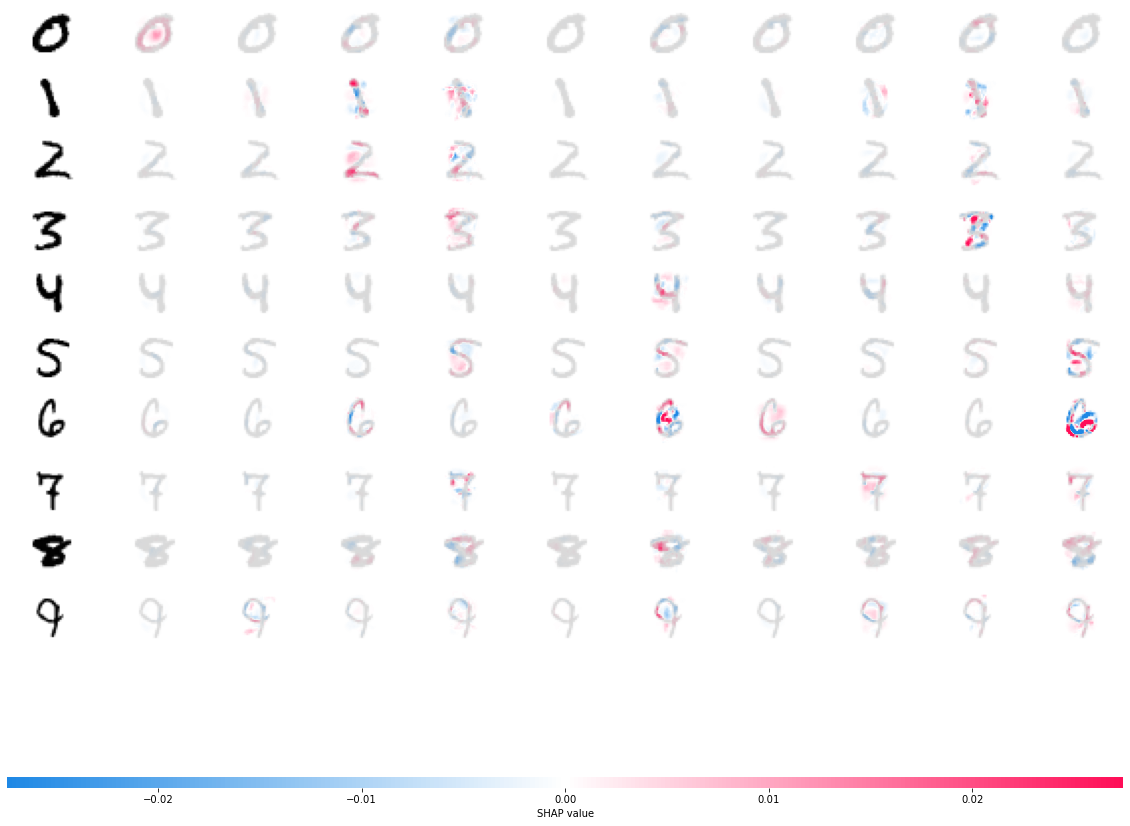

10 10


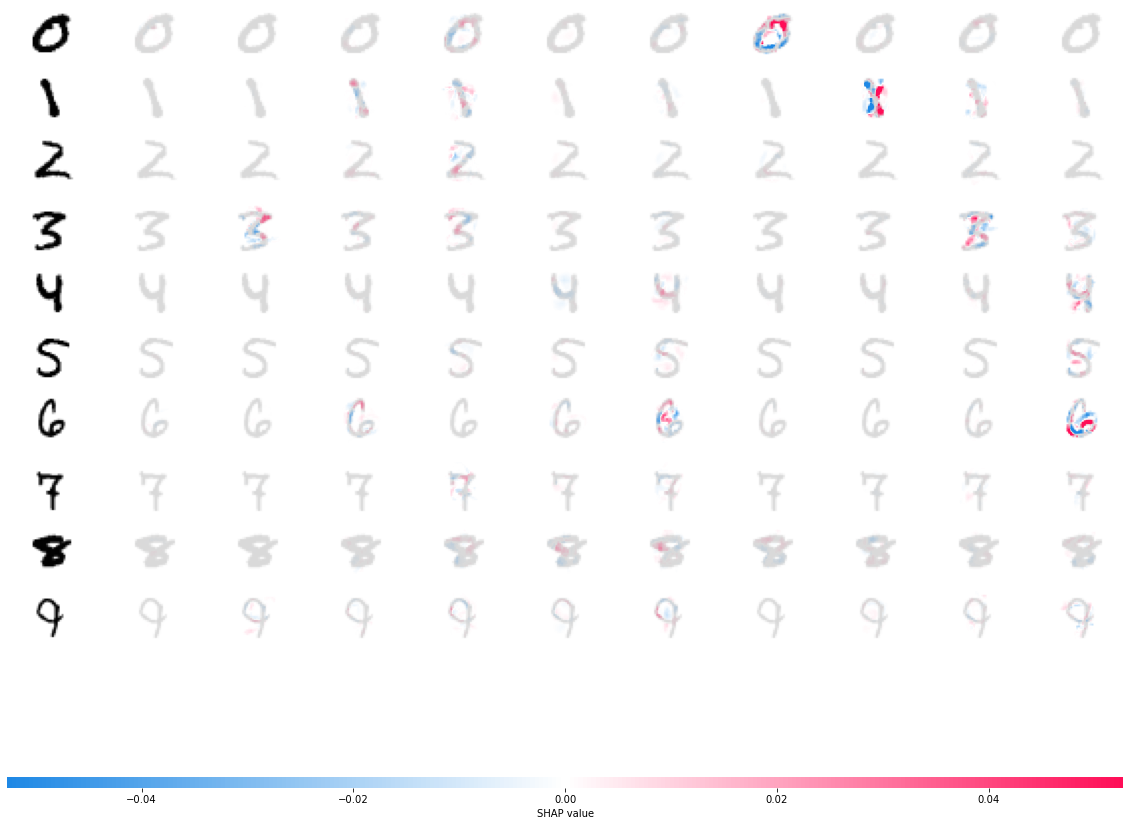

[0.0006028302304912359, 1.0386185749666765e-05, 0.00021838548127561808, 0.000137959563289769, 1.4963462490413804e-05, 6.677076453343034e-05, 0.00013338916323846206, 3.834521885437425e-05, 6.032692908775061e-06, 6.18537833361188e-05]
[1.7847805793280713e-06, 1.817003728032951e-09, 2.194567787228152e-05, 4.931329158353037e-06, -0.0001227576121891616, 2.601545531888405e-06, 2.6841468923066714e-06, -3.894385827152291e-06, -8.650711613711337e-08, 2.4333566273071483e-09]
Round 2 finished

Test set: Average loss: 0.0006, Accuracy: 8947/10000 (89%)

Server 3


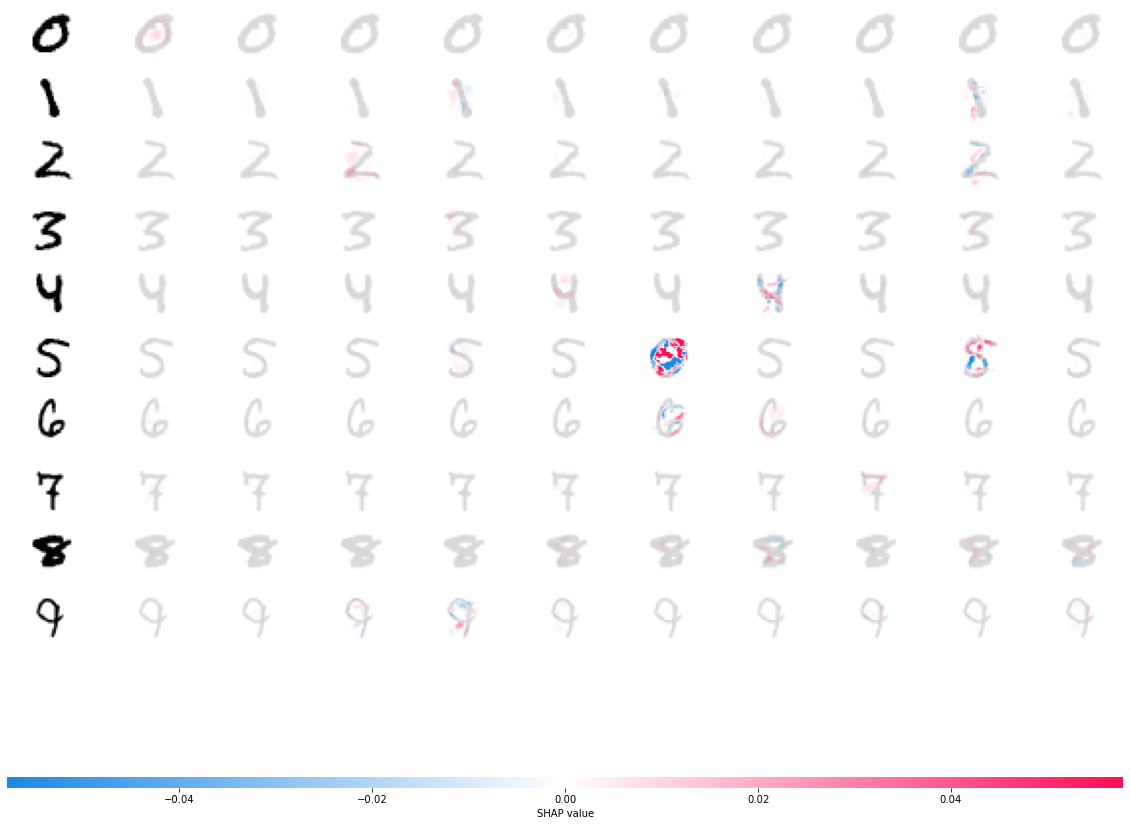

Client Clean 3


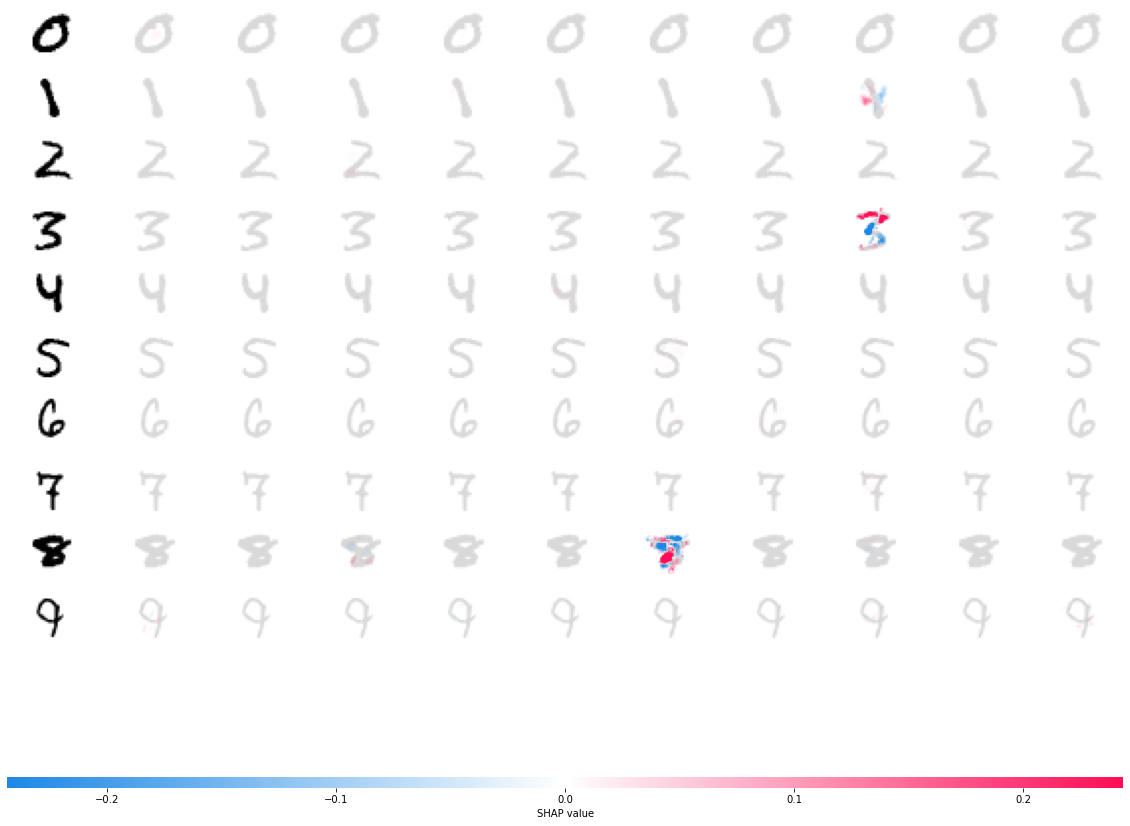

10 10


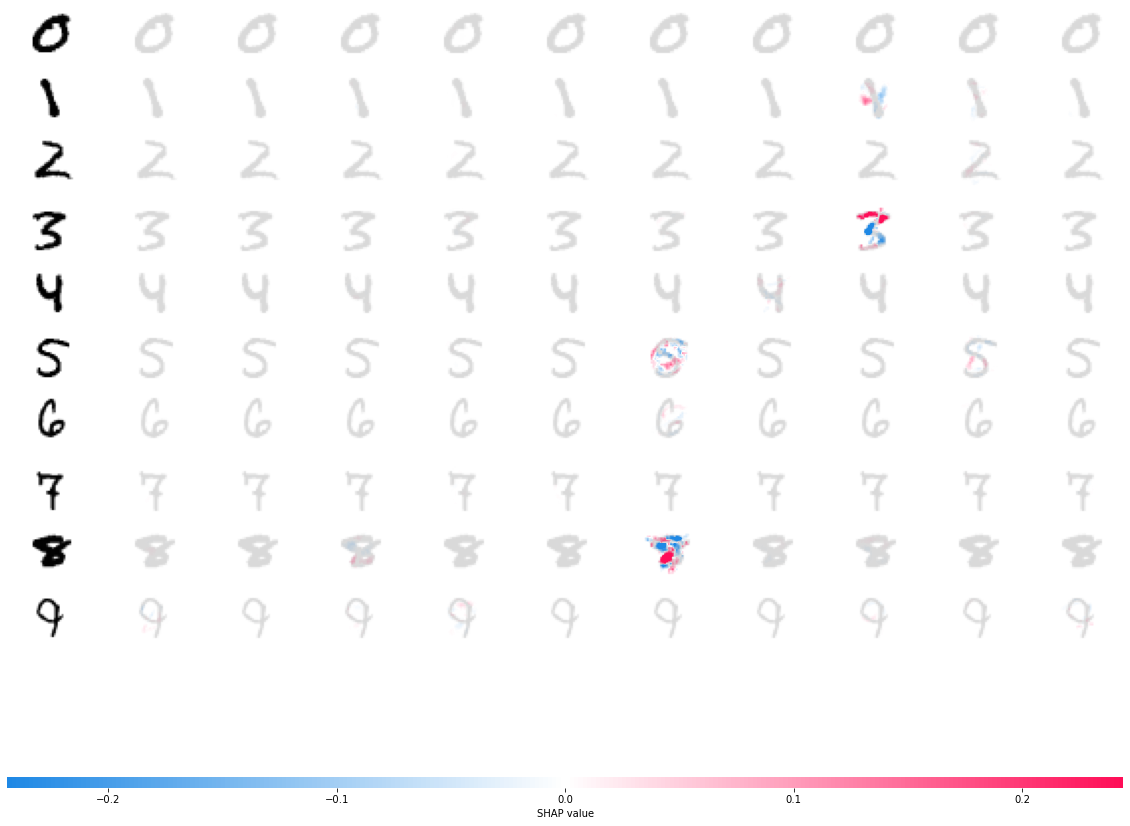

[0.0004122870886931196, 1.8972071302414406e-05, 0.00021192476560827345, 1.427249389962526e-05, 0.00013113091699779034, 9.54060051299166e-05, 0.00018342657131142914, 7.007646127021872e-05, 2.848488566087326e-05, 6.783823482692242e-05]
[1.6121824728543288e-06, 1.4703296983498149e-05, -4.0049199014902115e-06, -6.172666076054156e-07, -1.0035550076281652e-05, 4.268313773536647e-07, 1.1300076430131867e-08, 2.17287742998451e-05, -2.851414535598451e-07, -5.362192501134899e-08]
Client Poisoned 3


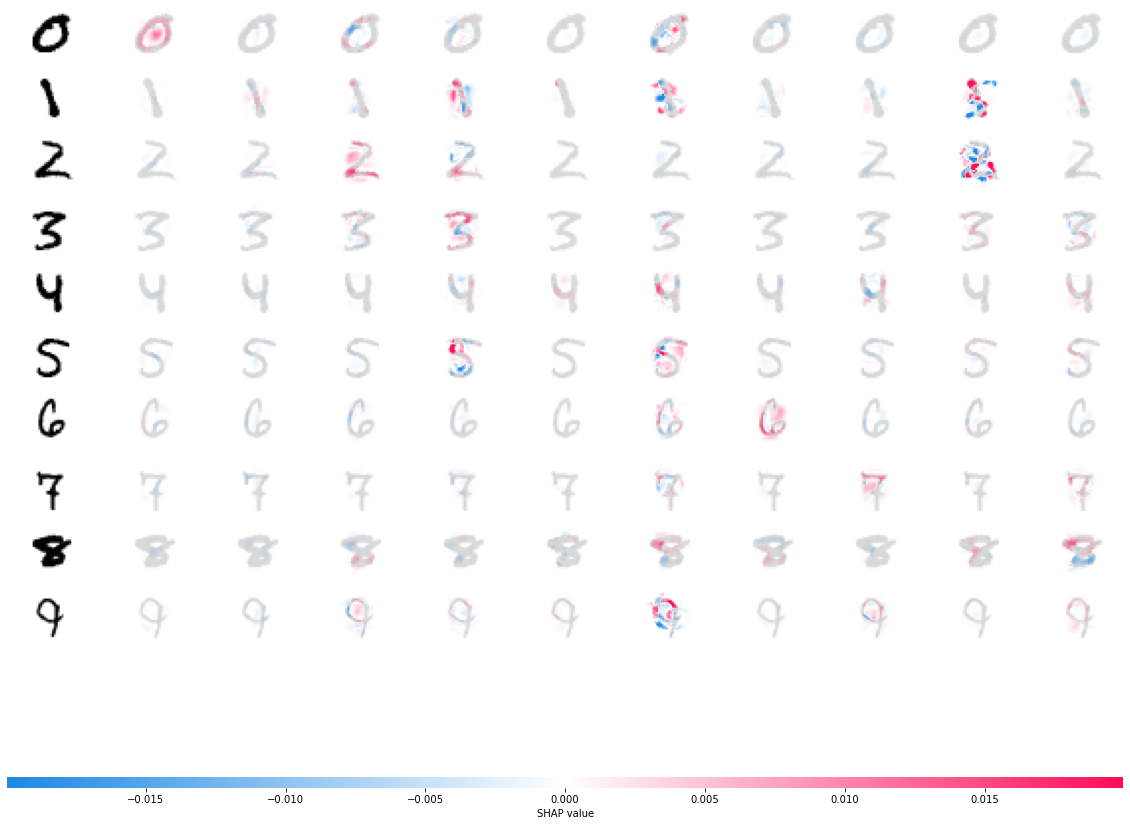

10 10


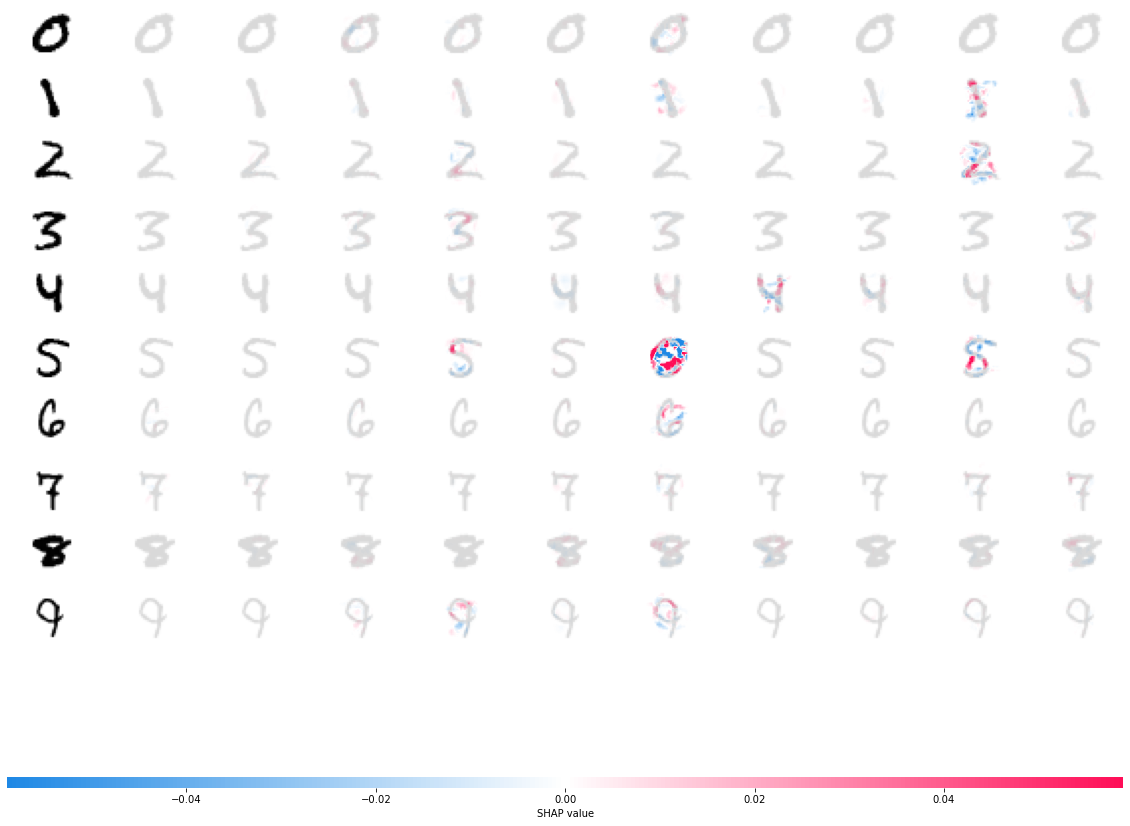

[0.0004671938222600147, 1.072381246558507e-05, 0.0002232142724096775, 4.4995060306973755e-05, 4.6385324822040275e-05, 0.00014897841901984066, 0.00017211647354997694, 4.7930332584655844e-05, 8.80551715454203e-06, 9.185112139675766e-05]
[1.0364734407630749e-05, -3.007339621774463e-08, -8.371983994948096e-08, 8.320554115925916e-06, -0.00011322565842419863, 3.8064543517180027e-07, 3.3708856790326536e-06, -1.5017336409073323e-05, -3.502692152324016e-06, -9.234889830622706e-08]
Round 3 finished

Test set: Average loss: 0.0006, Accuracy: 8970/10000 (90%)

Server 4


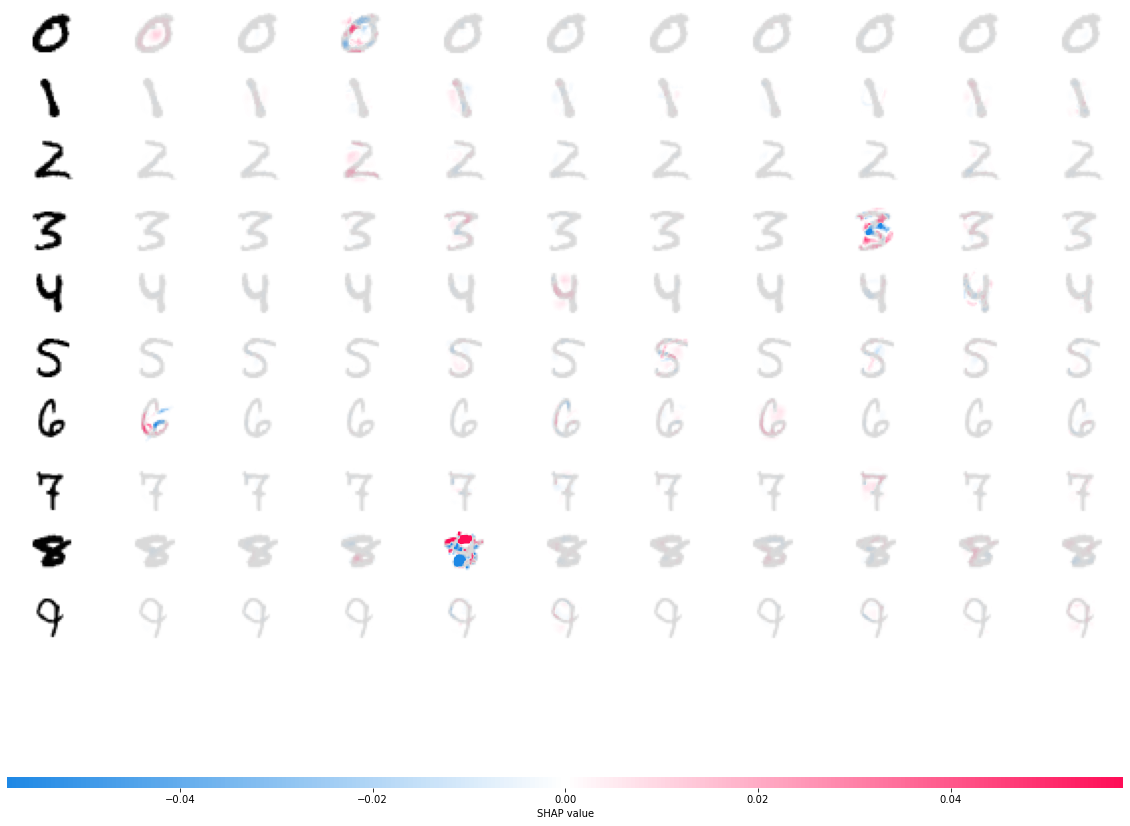

Client Clean 4


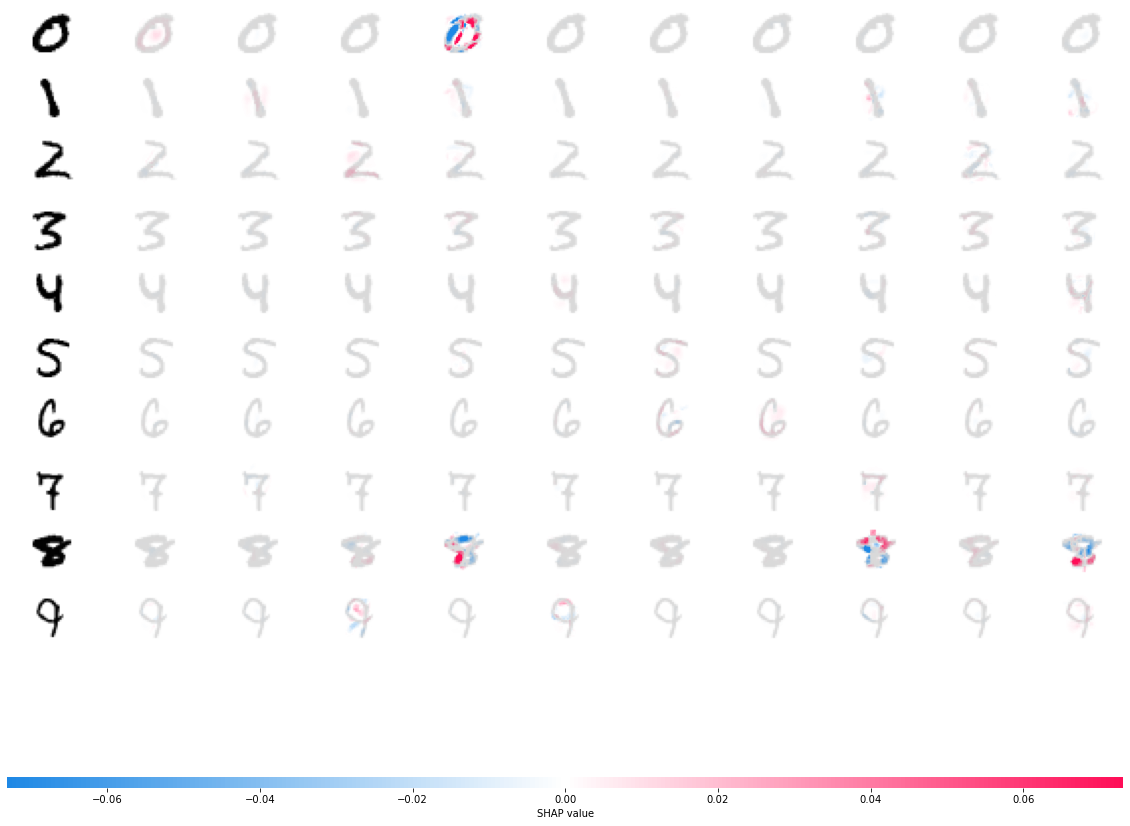

10 10


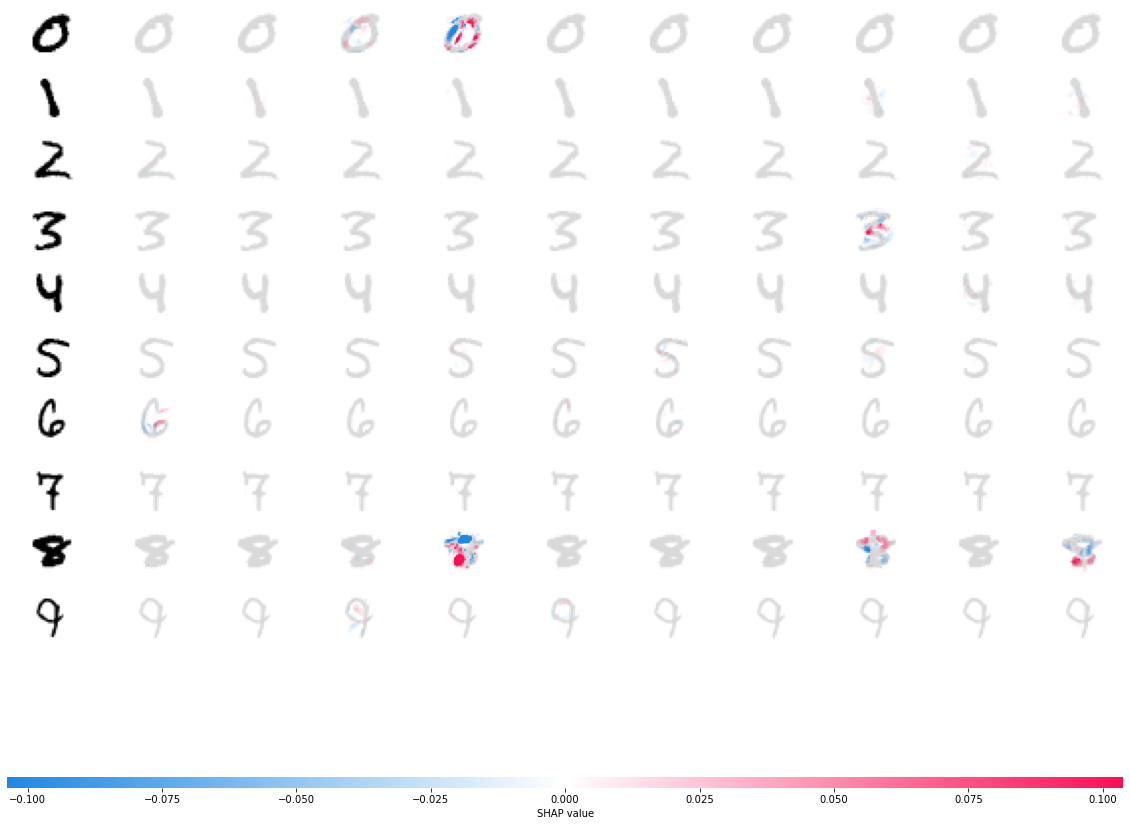

[0.00047885332605801523, 6.030672921042424e-05, 0.0002381369413342327, 3.582520002964884e-05, 8.727811291464604e-05, 0.00014759181794943288, 0.00018399356486042961, 4.7430350605282e-05, 6.892711326145218e-06, 0.0001941922673722729]
[-1.9233129933127202e-07, 5.0538350478746e-05, 3.041109266632702e-06, -1.6938793123699725e-06, -7.955758337629959e-05, 7.655156650798745e-07, -3.029762410733383e-06, -2.9120626550138695e-06, -1.4093703271100821e-07, 2.4568545995862223e-05]
Client Poisoned 4


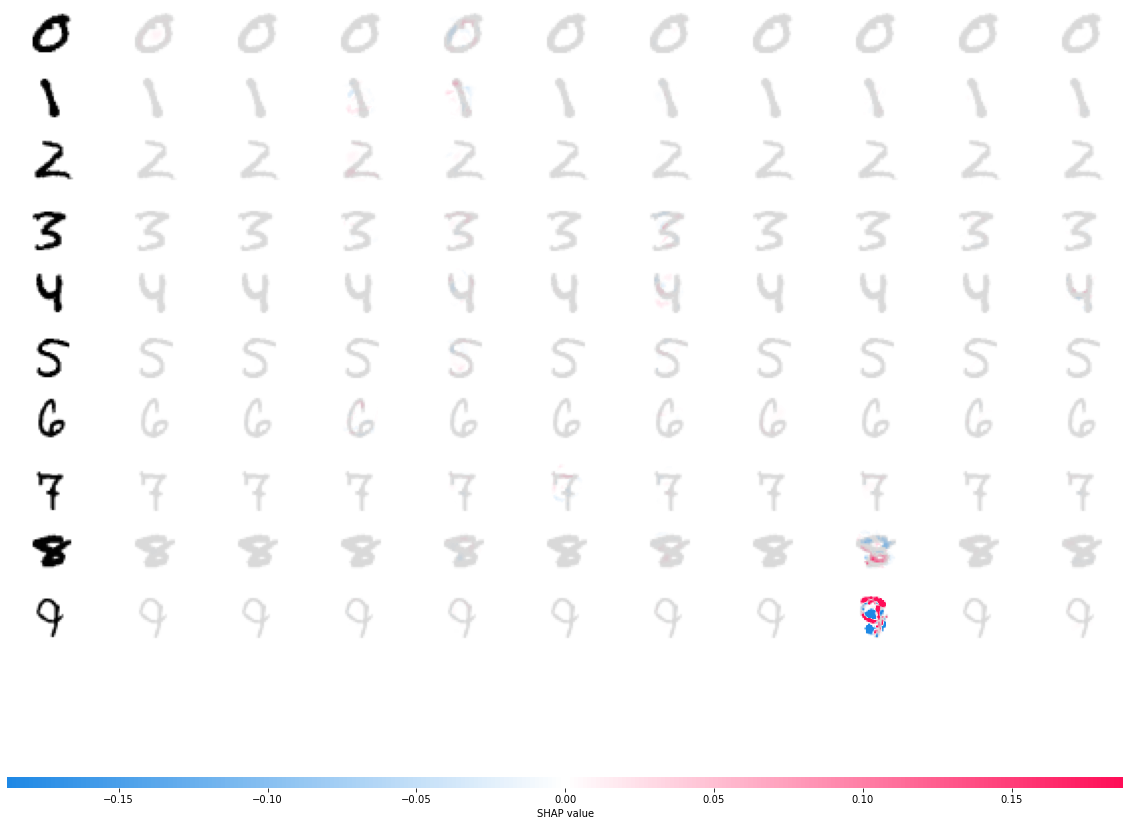

10 10


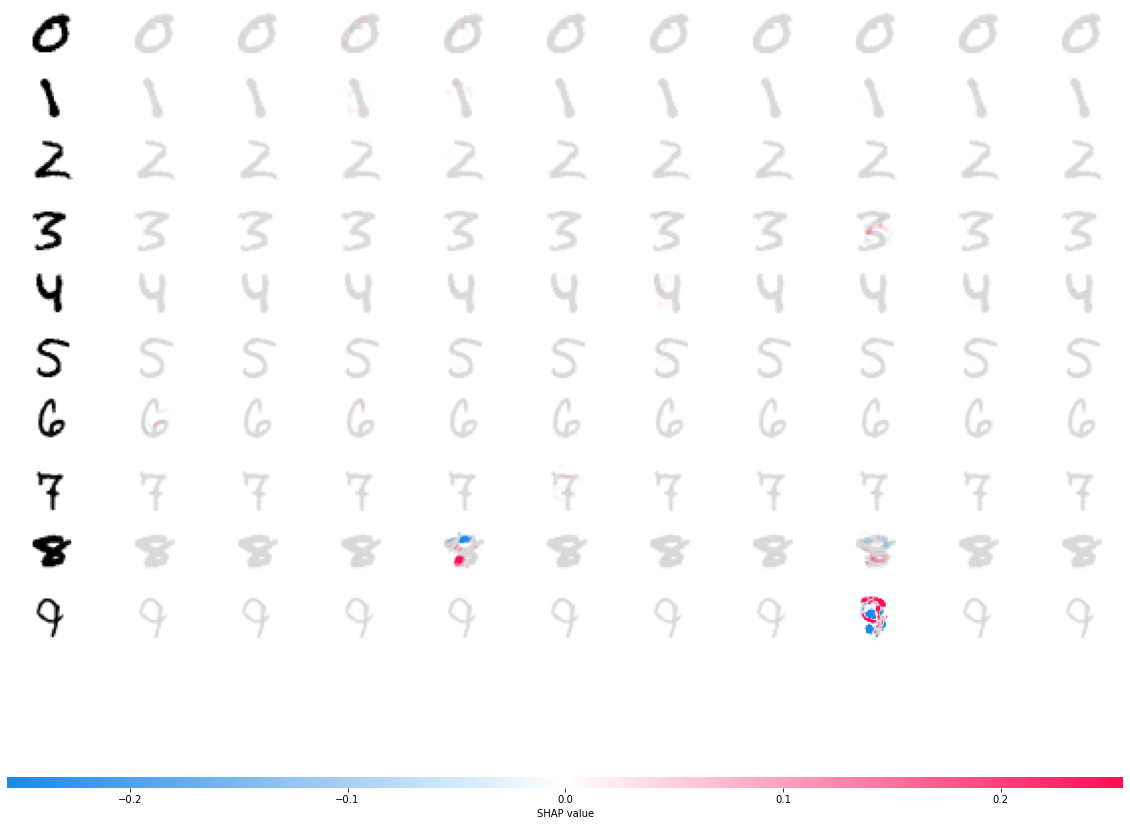

[0.00044630801130551845, 4.5873032377130585e-06, 0.0002701368648558855, 4.455716771190055e-05, 1.8963268303195946e-05, 7.131646725611063e-06, 0.00013787868374492973, 4.0415587136521935e-05, 9.394508197146934e-06, 1.1917198662558803e-05]
[-8.394948963541538e-06, -5.014700334982081e-05, 3.022898454219103e-06, 3.545871004462242e-05, -0.0001828226031648228, -1.5125499771784234e-05, -5.8848901971941814e-05, -4.210646693536546e-06, -4.239705958752893e-06, -4.361507308203727e-05]
Round 4 finished

Test set: Average loss: 0.0005, Accuracy: 8997/10000 (90%)

Server 5


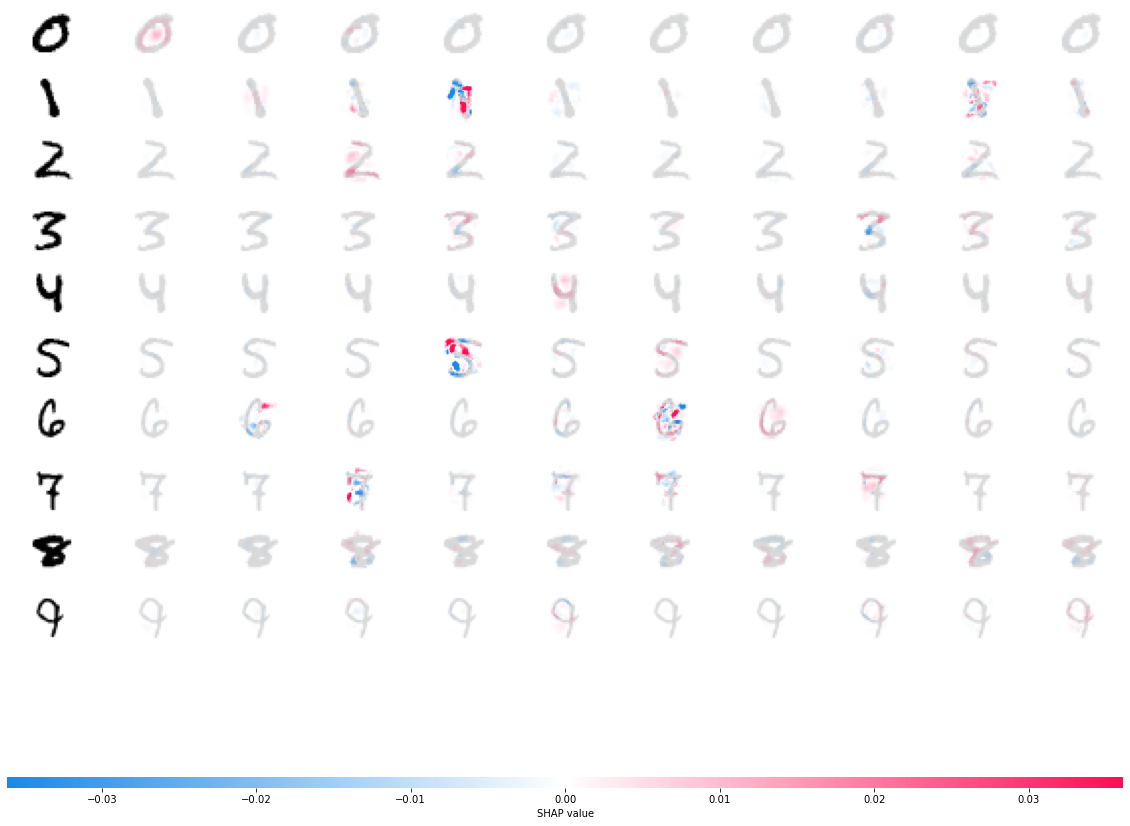

Client Clean 5


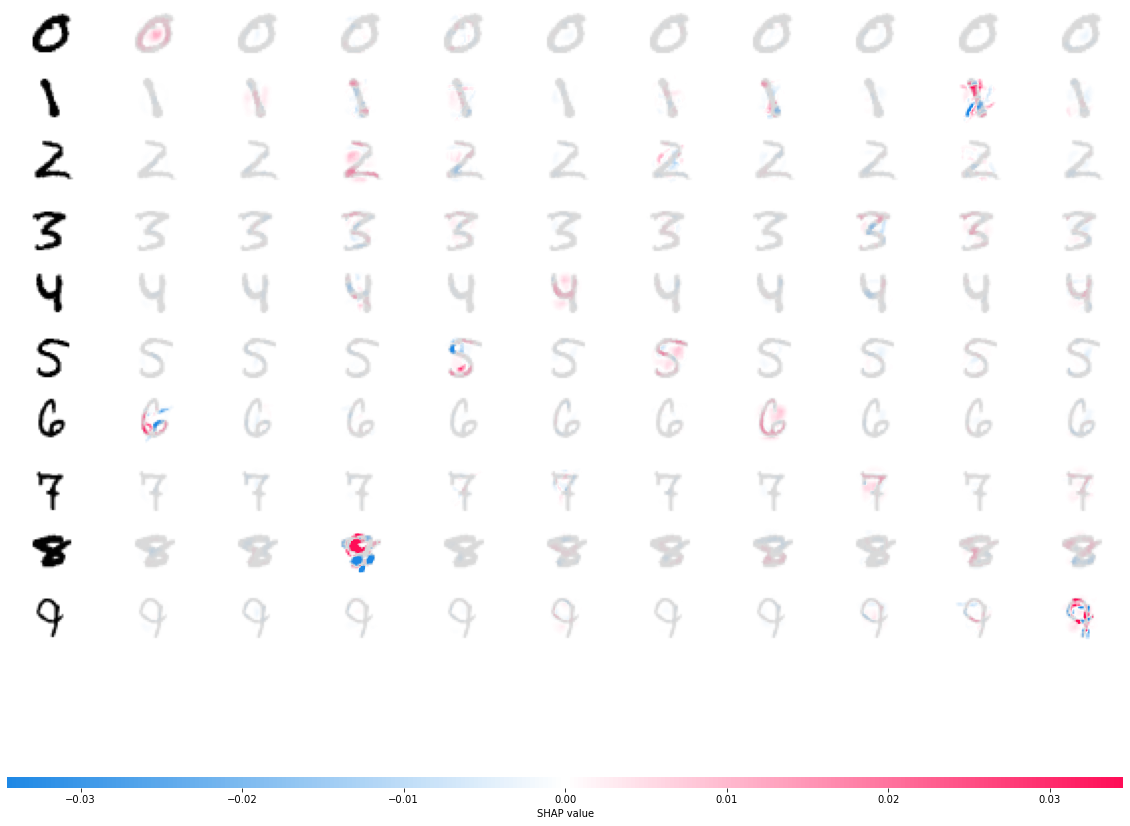

10 10


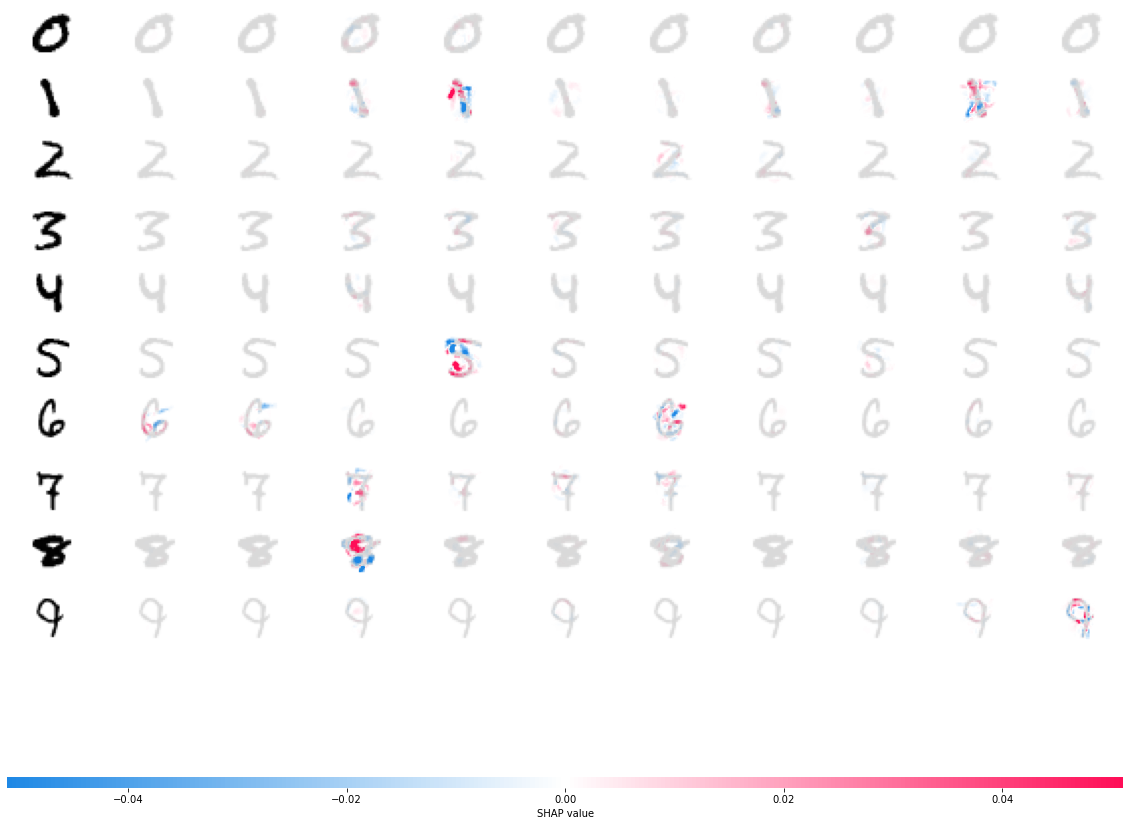

[0.00043864127655979246, 4.442103636392858e-05, 0.0002420115051791072, 1.4594474123441614e-05, 0.00017600976570975035, 0.00016456018784083426, 0.00024696024775039405, 4.8301968490704894e-05, 2.1356214347179048e-05, 0.00010133551404578611]
[6.570477353307069e-07, 8.007507545926273e-07, -4.346895821072394e-08, -1.8950344383483753e-05, -7.256159733515233e-06, 4.130480192543473e-06, 3.8814278013887815e-06, -3.518494850140996e-05, -3.4550025702628773e-06, 1.3761940863332711e-05]
Client Poisoned 5


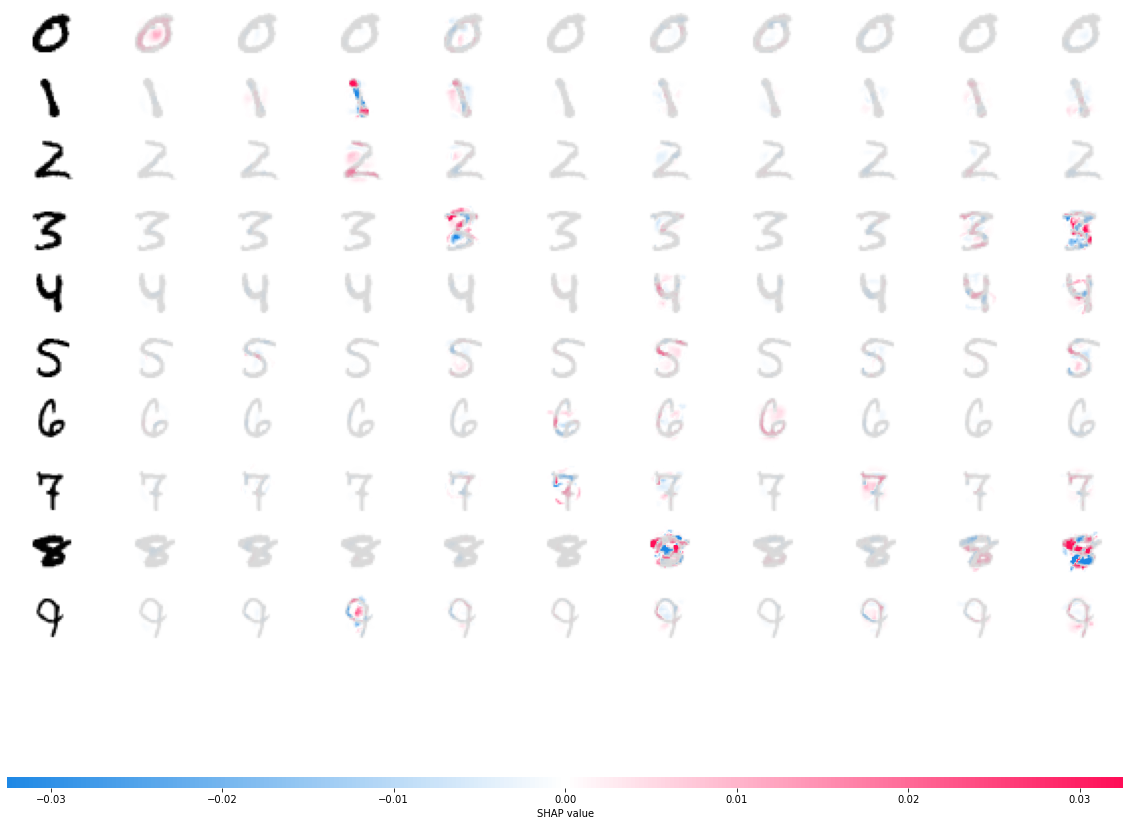

10 10


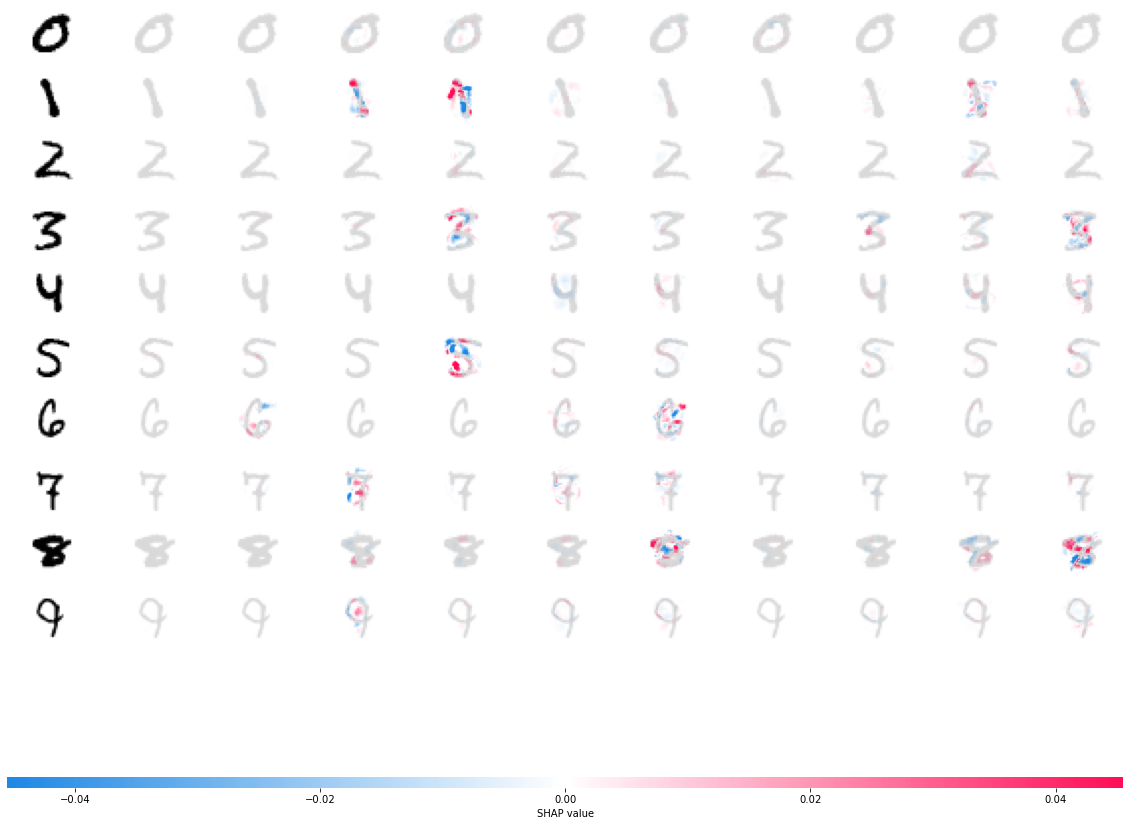

[0.0004365757049527019, 1.0371990356361493e-05, 0.000284136098343879, 1.3574071090260986e-05, 3.155626109219156e-05, 7.415421714540571e-05, 0.00020537425007205456, 3.790691880567465e-05, 1.7600164028408471e-06, 4.7838277168921195e-05]
[2.6087345759151503e-06, -5.3208636927593034e-05, -1.2640313798328862e-05, -7.16427166480571e-07, -0.00016303199663525447, -1.5272273827804383e-05, -1.5085073755471967e-05, -3.027762613783125e-05, -9.727137467052671e-06, 2.102676660342695e-06]
Round 5 finished


In [10]:
for i in range(15):
    experiment_util.run_round(client_plane, server, i+1)
for i in range(5):
    experiment_util.run_round(client_plane, server, i+1)
    server.test()
    print("Server {}".format(i+1))
    server_shap = server.get_shap_values()
    visualizer.plot_shap_values(server_shap)
    client_plane.update_clients(server.get_nn_parameters())
    experiment_util.update_configs(client_plane, server, config, observer_config)
    client_plane.poison_clients(1)
    for j in range(1):
        print("Client Clean {}".format(i+1))
        client_plane.clients[clean_idx[j]].train(i+1)
        clean_client_shap = client_plane.clients[clean_idx[j]].get_shap_values()
        visualizer.plot_shap_values(clean_client_shap)
        visualizer.compare_shap_values(clean_client_shap, server_shap)
        diag_mean_values(clean_client_shap,server_shap)
        
    client_plane.update_clients(server.get_nn_parameters())    
    for j in range(1):
        print("Client Poisoned {}".format(i+1))
        client_plane.clients[poisoned_idx[j]].train(i+1)
        poisoned_client_shap = client_plane.clients[poisoned_idx[j]].get_shap_values()
        visualizer.plot_shap_values(poisoned_client_shap)
        visualizer.compare_shap_values(poisoned_client_shap, server_shap)
        diag_mean_values(poisoned_client_shap,server_shap)
    print("Round {} finished".format(i+1))